In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
df_final = pd.read_csv('/content/drive/MyDrive/FA PROJECT 2021/Basic Regressors/NVAX/final.csv')
df_final = df_final.set_index('Datetime')
df_final

,Close,Comp
Datetime,,
2021-01-21 09:30:00,125.140099,0.296000
2021-01-21 10:30:00,127.050003,0.000000
2021-01-21 11:00:00,129.000000,0.401900
2021-01-21 11:30:00,127.809998,0.214233
2021-01-21 12:00:00,126.500000,0.000000
...,...,...
2021-03-22 13:00:00,236.160004,0.042700
2021-03-22 13:30:00,237.500000,0.200080
2021-03-22 14:00:00,237.669998,0.530700


In [4]:
import pandas as pd
from sklearn import preprocessing

x = df_final.values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1
0,0.015833,0.624317
1,0.025137,0.446507
2,0.034637,0.687932
3,0.028840,0.575199
4,0.022458,0.446507
...,...,...
495,0.556678,0.472157
496,0.563206,0.566697
497,0.564034,0.765303
498,0.569477,0.606416


In [5]:
df = df.set_index(df_final.index)
df

,0,1
Datetime,,
2021-01-21 09:30:00,0.015833,0.624317
2021-01-21 10:30:00,0.025137,0.446507
2021-01-21 11:00:00,0.034637,0.687932
2021-01-21 11:30:00,0.028840,0.575199
2021-01-21 12:00:00,0.022458,0.446507
...,...,...
2021-03-22 13:00:00,0.556678,0.472157
2021-03-22 13:30:00,0.563206,0.566697
2021-03-22 14:00:00,0.564034,0.765303


In [6]:
result = df_final.join(df)
result

,Close,Comp,0,1
Datetime,,,,
2021-01-21 09:30:00,125.140099,0.296000,0.015833,0.624317
2021-01-21 10:30:00,127.050003,0.000000,0.025137,0.446507
2021-01-21 11:00:00,129.000000,0.401900,0.034637,0.687932
2021-01-21 11:30:00,127.809998,0.214233,0.028840,0.575199
2021-01-21 12:00:00,126.500000,0.000000,0.022458,0.446507
...,...,...,...,...
2021-03-22 13:00:00,236.160004,0.042700,0.556678,0.472157
2021-03-22 13:30:00,237.500000,0.200080,0.563206,0.566697
2021-03-22 14:00:00,237.669998,0.530700,0.564034,0.765303


In [7]:
result = result.rename(columns={0: 'normalised_close', 1: 'normalised_comp'})
result

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
2021-01-21 09:30:00,125.140099,0.296000,0.015833,0.624317
2021-01-21 10:30:00,127.050003,0.000000,0.025137,0.446507
2021-01-21 11:00:00,129.000000,0.401900,0.034637,0.687932
2021-01-21 11:30:00,127.809998,0.214233,0.028840,0.575199
2021-01-21 12:00:00,126.500000,0.000000,0.022458,0.446507
...,...,...,...,...
2021-03-22 13:00:00,236.160004,0.042700,0.556678,0.472157
2021-03-22 13:30:00,237.500000,0.200080,0.563206,0.566697
2021-03-22 14:00:00,237.669998,0.530700,0.564034,0.765303


In [8]:
result.corr()

,Close,Comp,normalised_close,normalised_comp
Close,1.000000,-0.103112,1.000000,-0.103112
Comp,-0.103112,1.000000,-0.103112,1.000000
normalised_close,1.000000,-0.103112,1.000000,-0.103112
normalised_comp,-0.103112,1.000000,-0.103112,1.000000


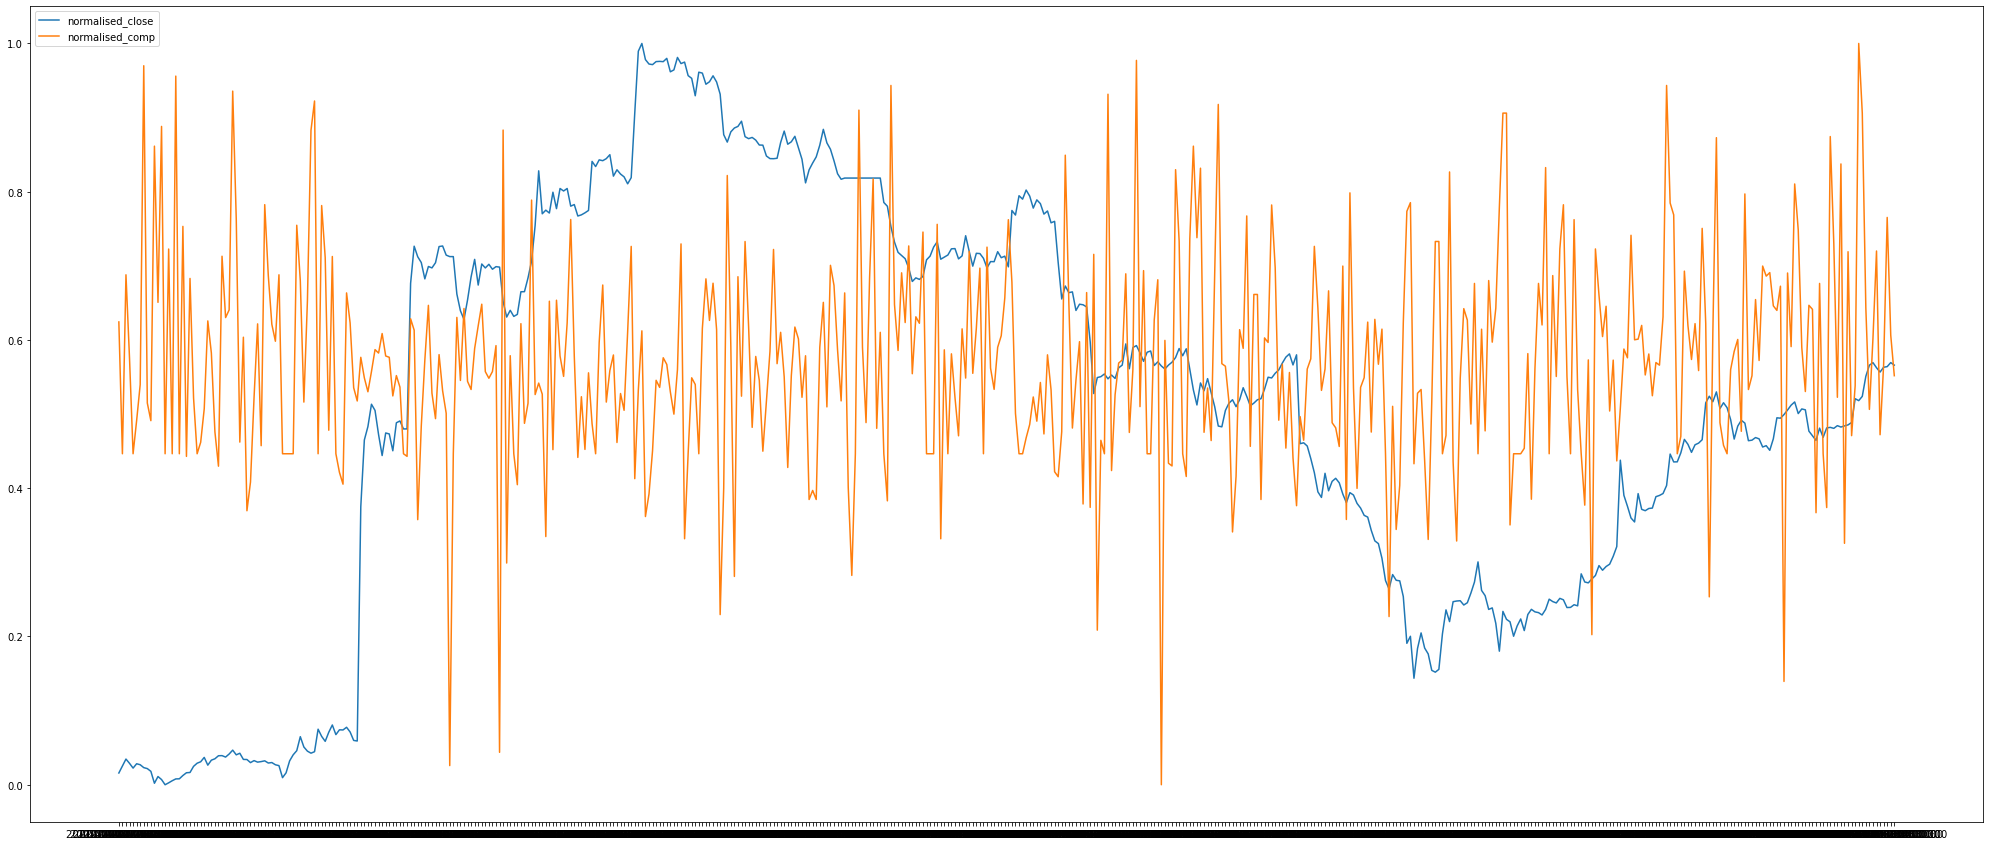

In [9]:
#Plot graphs
fig = plt.figure(figsize=(35,15))
plt.plot(result.index,result['normalised_close'], label = "normalised_close")
plt.plot(result.index,result['normalised_comp'], label = "normalised_comp")
plt.legend()
plt.show()

In [10]:
first_80pct = round((result.shape[0]/100 * 80))
first_80pct

400

In [11]:
#split into train test
train = result.iloc[:first_80pct]
test = result.iloc[first_80pct:]

In [12]:
train

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
2021-01-21 09:30:00,125.140099,0.296000,0.015833,0.624317
2021-01-21 10:30:00,127.050003,0.000000,0.025137,0.446507
2021-01-21 11:00:00,129.000000,0.401900,0.034637,0.687932
2021-01-21 11:30:00,127.809998,0.214233,0.028840,0.575199
2021-01-21 12:00:00,126.500000,0.000000,0.022458,0.446507
...,...,...,...,...
2021-03-09 14:00:00,164.580002,0.012200,0.207969,0.453836
2021-03-09 14:30:00,169.029999,0.224867,0.229647,0.581586
2021-03-09 15:00:00,170.460007,-0.102120,0.236614,0.385162


In [13]:
test

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
2021-03-10 10:00:00,168.899994,0.289233,0.229014,0.620252
2021-03-10 10:30:00,170.440002,0.642650,0.236516,0.832552
2021-03-10 11:00:00,173.275101,0.000000,0.250328,0.446507
2021-03-10 11:30:00,172.610001,0.400125,0.247088,0.686866
2021-03-10 12:00:00,172.229996,0.173500,0.245237,0.550730
...,...,...,...,...
2021-03-22 13:00:00,236.160004,0.042700,0.556678,0.472157
2021-03-22 13:30:00,237.500000,0.200080,0.563206,0.566697
2021-03-22 14:00:00,237.669998,0.530700,0.564034,0.765303


In [14]:
list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([train.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
X_train = np.asarray(list_of_sentiments_score)

In [15]:
list_of_sentiments_score = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([test.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
X_test = np.asarray(list_of_sentiments_score)

In [16]:
y_train = pd.DataFrame(train['Close'])
y_test = pd.DataFrame(test['Close'])

Random Forest

In [17]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
prediction= rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [18]:
prediction

array([170.35137192, 230.06219727, 206.75109521, 134.22378651,
       289.72274048, 189.38220688, 158.07178314, 289.72274048,
       206.75109521, 261.18095238, 257.80797108, 206.75109521,
       245.19424751, 236.06597473, 230.38519684, 189.38220688,
       230.81233353, 181.92181702, 257.76263336, 274.45423279,
       246.09569855, 170.43803513, 179.89880859, 257.74779556,
       281.95742035, 238.10232498, 245.51778763, 271.44796326,
       235.33425385, 251.4172879 , 247.90870392, 244.94979889,
       242.63465103, 286.1295549 , 250.31725876, 242.32297943,
       164.55403   , 209.39473877, 206.75109521, 249.11113663,
       234.93319809, 235.33425385, 236.06597473, 226.78700043,
       296.06278259, 150.09630142, 236.6982933 , 276.31273636,
       291.09773071, 162.61598367, 231.65701263, 160.73520355,
       206.75109521, 284.04195465, 282.89521057, 273.79715378,
       223.42987762, 215.23079422, 219.45407051, 284.19021545,
       248.93227407, 246.27883652, 232.08815201, 226.32

In [19]:
idx = test.index
predictions_df = pd.DataFrame(data=test['Close'], index = idx, columns=['Close'])
predictions_df['Close'] = predictions_df['Close'].apply(np.int64)
predictions_df['predicted_price'] = prediction
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
predictions_df.columns = ['Close', 'predicted_price']

In [20]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, prediction, squared=False)
print("Random Forest RMSE:",rmse)

Random Forest RMSE: 48.89795865845765


In [21]:
predictions_df

,Close,predicted_price
Datetime,,
2021-03-10 10:00:00,168,170
2021-03-10 10:30:00,170,230
2021-03-10 11:00:00,173,206
2021-03-10 11:30:00,172,134
2021-03-10 12:00:00,172,289
...,...,...
2021-03-22 13:00:00,236,215
2021-03-22 13:30:00,237,286
2021-03-22 14:00:00,237,212


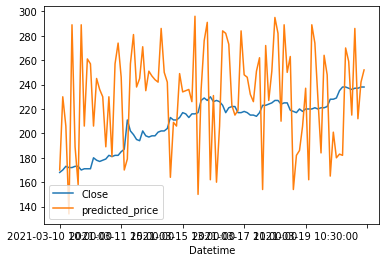

In [22]:
predictions_df.plot()

Linear Regression

In [23]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
prediction= regr.predict(X_test)

In [24]:
prediction

array([[227.70991054],
       [217.96361327],
       [235.68620118],
       [224.65181156],
       [230.90152989],
       [223.00061736],
       [220.26494363],
       [230.90318453],
       [235.68620118],
       [221.18657888],
       [231.72471397],
       [235.68620118],
       [238.86862807],
       [229.87427337],
       [246.89088097],
       [223.00153661],
       [225.85625259],
       [228.42967954],
       [226.55258083],
       [233.03956291],
       [229.88751051],
       [236.13074816],
       [232.86858331],
       [229.20092626],
       [229.74328093],
       [222.15638257],
       [228.62815293],
       [228.58715331],
       [227.73736111],
       [230.80604329],
       [229.50755449],
       [232.0939261 ],
       [230.03677086],
       [230.20045221],
       [227.20547474],
       [212.87696993],
       [220.15739195],
       [220.89094962],
       [235.68620118],
       [234.60930542],
       [224.37672743],
       [227.73944129],
       [229.84886281],
       [227

In [25]:
idx = test.index
predictions_df = pd.DataFrame(data=test['Close'], index = idx, columns=['Close'])
predictions_df['Close'] = predictions_df['Close'].apply(np.int64)
predictions_df['predicted_price'] = prediction
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
predictions_df.columns = ['Close', 'predicted_price']

In [26]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, prediction, squared=False)
print("Linear Regression RMSE:",rmse)

Linear Regression RMSE: 28.688435996153764


An R2 score near 1 means that the model is able to predict the data very well.  A good practice is to make sure that the mean squared error is low and the explained variance score is high.

Even though our R2 is good, but our Mean squared error and Explain variance score is not good.

In [27]:
predictions_df

,Close,predicted_price
Datetime,,
2021-03-10 10:00:00,168,227
2021-03-10 10:30:00,170,217
2021-03-10 11:00:00,173,235
2021-03-10 11:30:00,172,224
2021-03-10 12:00:00,172,230
...,...,...
2021-03-22 13:00:00,236,234
2021-03-22 13:30:00,237,230
2021-03-22 14:00:00,237,221


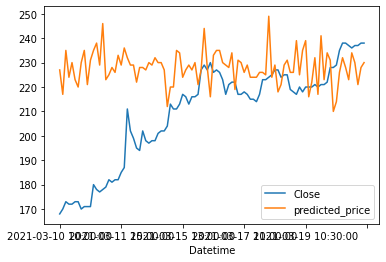

In [28]:
predictions_df.plot()

Adaboost Regressor

In [29]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train,y_train)
prediction= regr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
prediction

array([235.00595346, 214.72863388, 213.58952555, 221.64551426,
       254.56784917, 221.58330894, 208.10637858, 254.56784917,
       213.58952555, 214.72863388, 237.26999294, 213.58952555,
       223.01438292, 247.68673845, 223.01438292, 221.58330894,
       222.82554907, 235.00595346, 221.64551426, 235.00595346,
       247.68673845, 213.58952555, 235.00595346, 247.68673845,
       247.68673845, 215.80429875, 235.00595346, 235.00595346,
       237.26999294, 254.56784917, 247.68673845, 237.26999294,
       254.56784917, 254.56784917, 221.64551426, 208.10637858,
       208.10637858, 208.10637858, 213.58952555, 217.05546271,
       221.64551426, 237.26999294, 247.68673845, 222.82554907,
       254.56784917, 208.10637858, 222.82554907, 223.01438292,
       237.26999294, 192.34458367, 223.01438292, 217.05546271,
       213.58952555, 254.56784917, 247.68673845, 235.00595346,
       217.05546271, 214.72863388, 237.26999294, 254.56784917,
       222.82554907, 247.68673845, 221.64551426, 221.64

In [31]:
idx = test.index
predictions_df = pd.DataFrame(data=test['Close'], index = idx, columns=['Close'])
predictions_df['Close'] = predictions_df['Close'].apply(np.int64)
predictions_df['predicted_price'] = prediction
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
predictions_df.columns = ['Close', 'predicted_price']

In [32]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, prediction, squared=False)
print("Adaboost RMSE:",rmse)

Adaboost RMSE: 31.955113851703175


In [33]:
predictions_df

,Close,predicted_price
Datetime,,
2021-03-10 10:00:00,168,235
2021-03-10 10:30:00,170,214
2021-03-10 11:00:00,173,213
2021-03-10 11:30:00,172,221
2021-03-10 12:00:00,172,254
...,...,...
2021-03-22 13:00:00,236,217
2021-03-22 13:30:00,237,254
2021-03-22 14:00:00,237,208


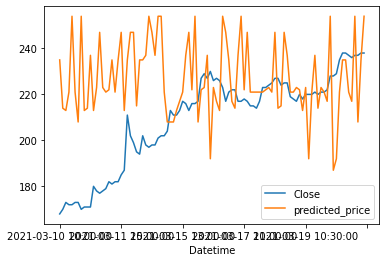

In [34]:
predictions_df.plot()

Basic machine learning regressors are not suitable in predicting stock prices. Hence, we will try deep learning